In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Suicidesindia2001-2012.csv')

In [3]:
D = data.groupby('Year').Total.sum()
D

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

In [4]:
X= D.index.values
y = D.values

In [5]:
X = D.index.values.reshape(-1,1)
X

array([[2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

In [6]:
y = y.reshape(len(y),1)
y


array([[ 976464],
       [ 993648],
       [ 997622],
       [1023137],
       [1025201],
       [1062991],
       [1103667],
       [1125082],
       [1144033],
       [1211322],
       [1219499],
       [1189068]], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\Users\sarfa\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [10]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))


In [11]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1087760.44 1103667.  ]
 [1194234.33 1189068.  ]
 [1047636.95 1025201.  ]]


In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.941709890305031

In [13]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[2020]])))

array([1084864.45])

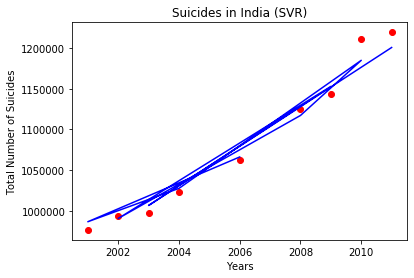

In [14]:
plt.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color = 'red')
plt.plot(sc_X.inverse_transform(X_train), sc_y.inverse_transform(regressor.predict(X_train)), color = 'blue')
plt.title('Suicides in India (SVR)')
plt.xlabel('Years')
plt.ylabel('Total Number of Suicides')
plt.show()